# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


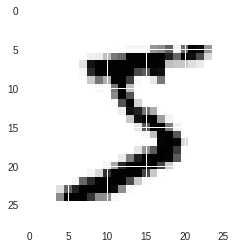

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

AveragePooling2D(data_format=None)
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1396 - acc: 0.9584
Epoch 2/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0443 - acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0303 - acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0244 - acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0179 - acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0153 - acc: 0.9951
Epoch 7/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0117 - acc: 0.9961
Epoch 8/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0111 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0081 - acc: 0.9975
Epoch 10/10
60000/60000 [==============================] - 16s 270us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.04417950402099996, 0.9904]


In [17]:
X_test[0].shape

(28, 28, 1)

In [18]:
model.predict(X_test[:2])

array([[3.9831915e-16, 3.3236752e-18, 2.6939099e-11, 4.7434002e-13,
        8.1490398e-23, 1.3259771e-16, 1.2432117e-28, 1.0000000e+00,
        1.9241094e-18, 6.5639959e-11],
       [3.7141309e-16, 5.3794060e-17, 1.0000000e+00, 2.9934334e-21,
        2.7335684e-22, 8.3201437e-29, 4.1494682e-17, 4.1430856e-21,
        7.0565377e-19, 1.9855855e-21]], dtype=float32)

In [0]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [0]:
from google.colab import files


In [0]:
from IPython.display import Image

In [22]:
uploaded = files.upload()

Saving digit.png to digit.png


In [0]:
#y_pred = model.predict(X_test)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
#image is started

In [24]:
ls

digit.png     weights00000010.h5  weights00000030.h5  weights00000050.h5
sample_data/  weights00000020.h5  weights00000040.h5  Yolo_Basic_model2.h5


In [0]:
 from PIL import Image

In [0]:
pil_image=Image.open('digit.png').convert('RGB')

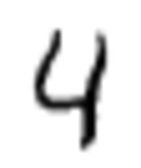

In [27]:
pil_image

In [0]:
foo = pil_image.resize((28,28),Image.ANTIALIAS)

In [29]:
foo

In [0]:
import numpy as np
import PIL.ImageOps
inverted_image=PIL.ImageOps.invert(foo)

In [31]:
inverted_image

In [0]:
invert_2=inverted_image.convert('1')

In [0]:
arr1=np.array(invert_2)

In [0]:
img_1=arr1.astype(float)

In [0]:
img_2 = img_1[..., np.newaxis]

In [0]:
final=img_2[np.newaxis,...]

In [37]:
final.shape

(1, 28, 28, 1)

In [38]:
model.predict(final)

array([[4.89119514e-15, 2.60261397e-15, 3.54899823e-17, 6.00702200e-18,
        1.00000000e+00, 1.28350140e-15, 1.05642105e-13, 9.00051347e-21,
        1.96862671e-14, 5.98093103e-11]], dtype=float32)